In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
df=pd.read_csv('Advertising.csv')

In [21]:
df=pd.read_csv('Advertising.csv',index_col=0)

In [22]:
features=df.drop('sales',axis=1)
target=df[['sales']]

In [23]:
target

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [24]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [25]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [26]:
lasso=Lasso(alpha=10)

In [27]:
lasso.fit(x_train,y_train)

Lasso(alpha=10)

In [28]:
y_pred=lasso.predict(x_test)

In [29]:
y_pred

array([ 9.96214787, 19.59602497, 16.07102306, 18.56191519, 20.29393736,
       13.9337817 , 12.24111536, 13.27349757, 19.70348785, 20.04325998,
       11.31547333, 18.91421575,  7.26987674, 15.41012236,  9.54913568,
        8.85275207, 15.82719698, 12.67688998, 16.62010699, 11.5181461 ,
       17.03778217, 10.54446324, 19.64190698, 16.72657848, 15.26576065,
       20.94600397, 18.65585825, 10.26041207, 18.61622024, 14.49094334,
       13.49240239,  8.36919184, 10.56372337, 14.9980384 ,  7.8557399 ,
       13.48215239,  8.48950828, 12.49395156, 14.36828949, 15.25665786,
       17.01057321, 14.03487423, 14.33854014, 14.48644038, 12.16658827,
        9.38298692, 11.07151418, 19.01679411,  9.42103297,  6.172034  ])

In [30]:
lasso.intercept_

array([3.92182446])

In [31]:
lasso.coef_

array([0.04473479, 0.14630828, 0.        ])

In [32]:
lasso.score(x_test,y_test)

0.8959395754239059

In [33]:
import seaborn as sns

In [34]:
ridge=Ridge(alpha=5)

In [35]:
ridge.fit(x_train,y_train)

Ridge(alpha=5)

In [36]:
y_pred=ridge.predict(x_test)

In [37]:
y_pred

array([[10.56332732],
       [20.01193361],
       [16.88876406],
       [19.17959372],
       [20.95216796],
       [13.17490171],
       [11.82562933],
       [12.37096555],
       [20.56928088],
       [20.94220526],
       [10.79969509],
       [19.56536907],
       [ 6.43612447],
       [15.24801513],
       [ 8.98107677],
       [ 7.91969618],
       [16.21560404],
       [12.06608272],
       [17.07836193],
       [11.26815279],
       [16.99614033],
       [ 9.78856196],
       [20.80044079],
       [17.20472449],
       [15.1560067 ],
       [21.9467841 ],
       [19.20961063],
       [10.06612782],
       [19.3635741 ],
       [14.84254656],
       [14.31373677],
       [ 7.56097917],
       [ 9.99471622],
       [14.78798468],
       [ 7.20806794],
       [13.58583378],
       [ 7.52167135],
       [11.74600706],
       [13.51955514],
       [15.25393653],
       [17.20722903],
       [13.59015839],
       [14.32554001],
       [13.78506942],
       [11.8871075 ],
       [ 8

In [38]:
ridge.coef_

array([[0.04569463, 0.18794196, 0.00474402]])

In [39]:
ridge.intercept_

array([2.6559197])

In [40]:
ridge.score(x_test,y_test)

0.9018573327879406

<Axes: xlabel='sales'>

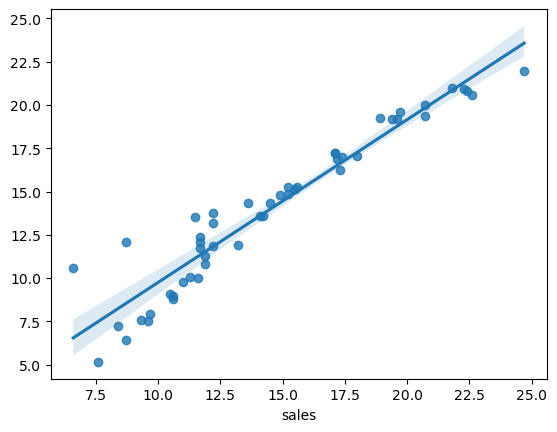

In [41]:
sns.regplot(data=df,x=y_test,y=y_pred)

In [42]:
elasticnet=ElasticNet(alpha=3)

In [43]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=3)

In [44]:
y_pred=elasticnet.predict(x_test)

In [45]:
y_pred

array([10.44995831, 19.95077535, 16.7428048 , 19.06617856, 20.84364557,
       13.31123869, 11.89899719, 12.53610509, 20.41911826, 20.79023465,
       10.89615925, 19.44169836,  6.57823402, 15.28398282,  9.07933261,
        8.08672864, 16.15667581, 12.17094207, 17.00729651, 11.3081852 ,
       17.01374688,  9.91863115, 20.59502497, 17.12072416, 15.17892927,
       21.78488383, 19.11165778, 10.09749046, 19.24496458, 14.78726544,
       14.16866651,  7.70807845, 10.08683583, 14.82717488,  7.32145932,
       13.57270562,  7.6878908 , 11.88153805, 13.67378718, 15.24484704,
       17.16685607, 13.67682037, 14.32324018, 13.90926672, 11.94091708,
        8.88516518, 11.87222817, 19.19575421,  9.13609571,  5.33932486])

In [46]:
elasticnet.intercept_

array([2.88050193])

In [47]:
elasticnet.coef_

array([0.04555492, 0.18075671, 0.00361051])

In [48]:
elasticnet.score(x_test,y_test)

0.9040662527809952

In [49]:
value=range(0,100)

In [50]:
params=dict(alpha=value)

In [51]:
grid=GridSearchCV(elasticnet,params)

In [52]:
grid.fit(x_train,y_train)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.070e+02, tolerance: 3.931e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

GridSearchCV(estimator=ElasticNet(alpha=3), param_grid={'alpha': range(0, 100)})

In [53]:
grid.best_params_

{'alpha': 0}